In [2]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



Data dimensions: (506, 13)


In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [3]:
boston.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979



Histogram of the Prelim Model Data of Boston DataFrame:


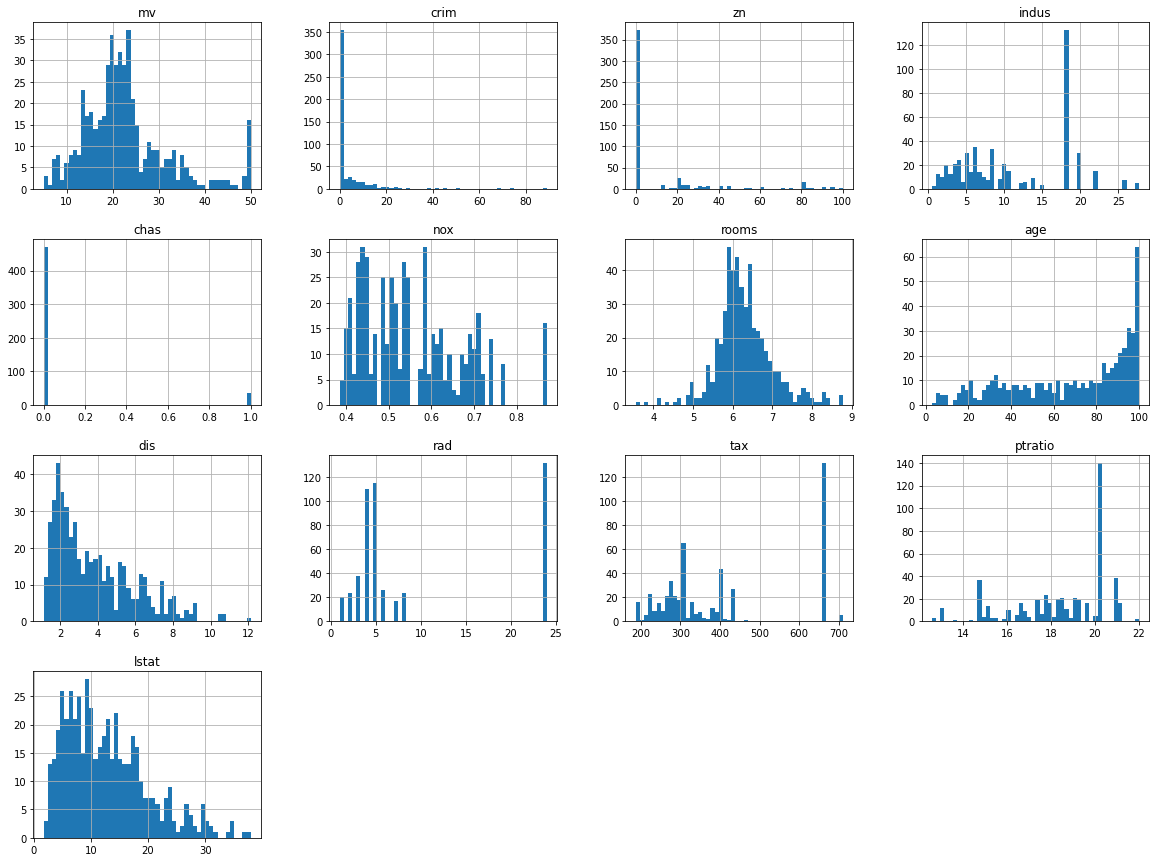

In [43]:
# histogram of prelim data
print('\nHistogram of the Prelim Model Data of Boston DataFrame:')
import matplotlib.pyplot as plt
boston_prelim=pd.DataFrame(prelim_model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_prelim.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

StandardScaler()
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)



Histogram of the Scaled Model Data of Boston DataFrame:


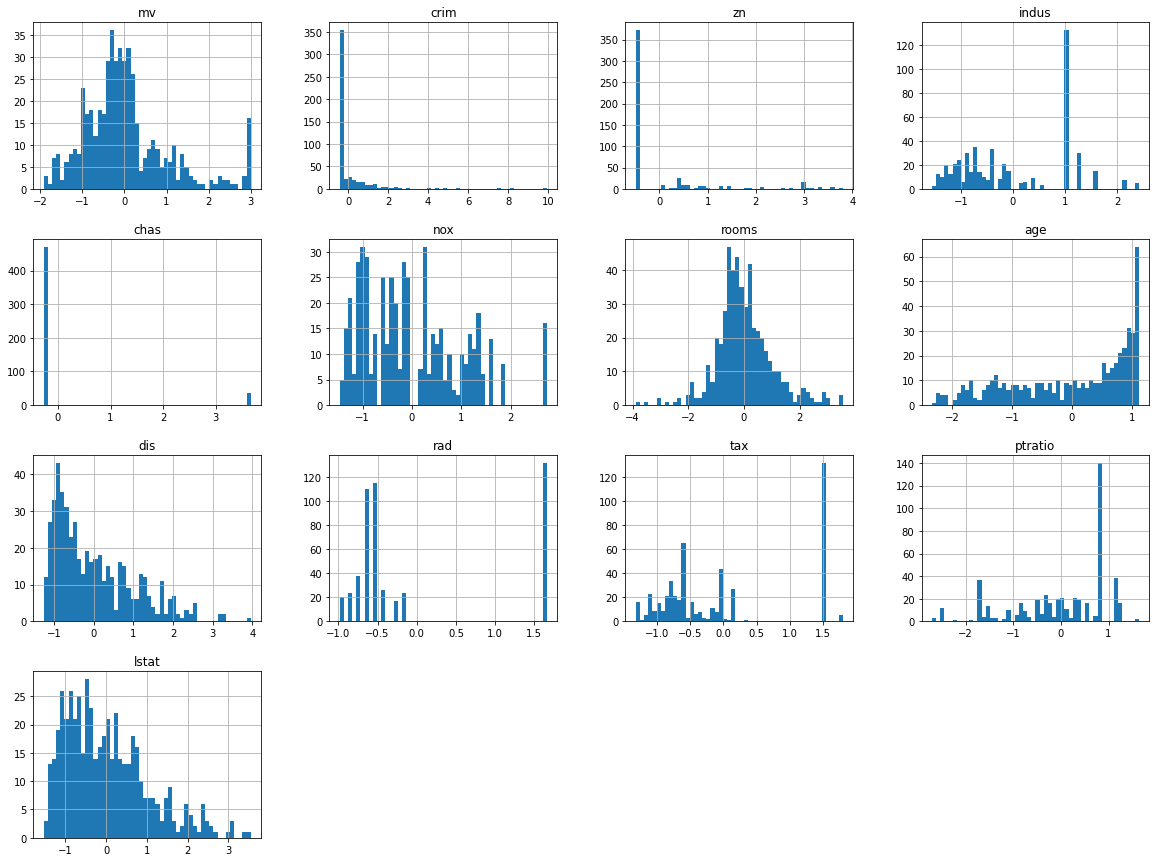

In [45]:
# histogram of scaled model data
print('\nHistogram of the Scaled Model Data of Boston DataFrame:')
boston_scaled=pd.DataFrame(model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
corr_matrix=boston_scaled.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

In [54]:
import seaborn as sns
sns.set(style='darkgrid')

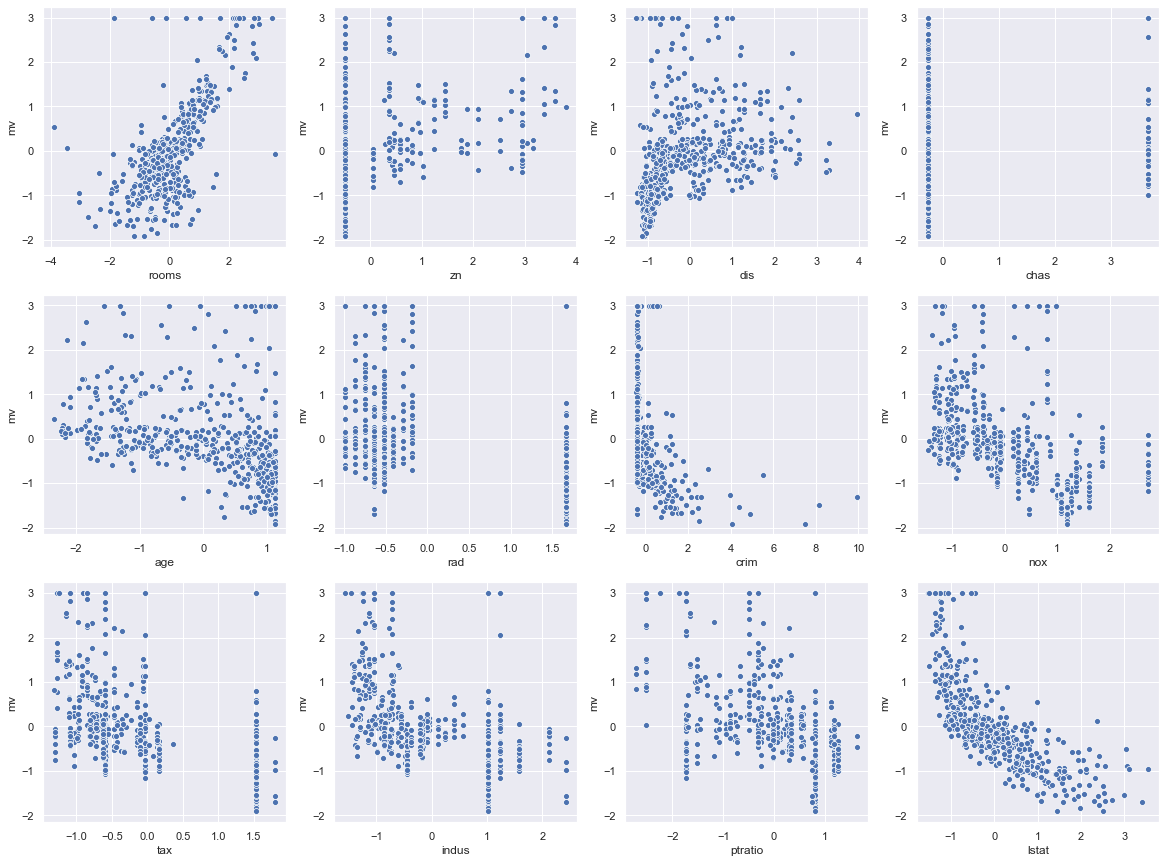

In [93]:
fig,axs=plt.subplots(nrows=3, ncols=4,figsize=(20,15))
g1=sns.relplot(x='rooms',y='mv',data=boston_scaled,ax=axs[0,0])
g2=sns.relplot(x='zn',y='mv',data=boston_scaled,ax=axs[0,1])
g3=sns.relplot(x='dis',y='mv',data=boston_scaled,ax=axs[0,2])
g4=sns.relplot(x='chas',y='mv',data=boston_scaled,ax=axs[0,3])
g5=sns.relplot(x='age',y='mv',data=boston_scaled,ax=axs[1,0])
g6=sns.relplot(x='rad',y='mv',data=boston_scaled,ax=axs[1,1])
g7=sns.relplot(x='crim',y='mv',data=boston_scaled,ax=axs[1,2])
g8=sns.relplot(x='nox',y='mv',data=boston_scaled,ax=axs[1,3])
g9=sns.relplot(x='tax',y='mv',data=boston_scaled,ax=axs[2,0])
g10=sns.relplot(x='indus',y='mv',data=boston_scaled,ax=axs[2,1])
g11=sns.relplot(x='ptratio',y='mv',data=boston_scaled,ax=axs[2,2])
g12=sns.relplot(x='lstat',y='mv',data=boston_scaled,ax=axs[2,3])
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)
plt.close(g4.fig)
plt.close(g5.fig)
plt.close(g6.fig)
plt.close(g7.fig)
plt.close(g8.fig)
plt.close(g9.fig)
plt.close(g10.fig)
plt.close(g11.fig)
plt.close(g12.fig)
plt.show()


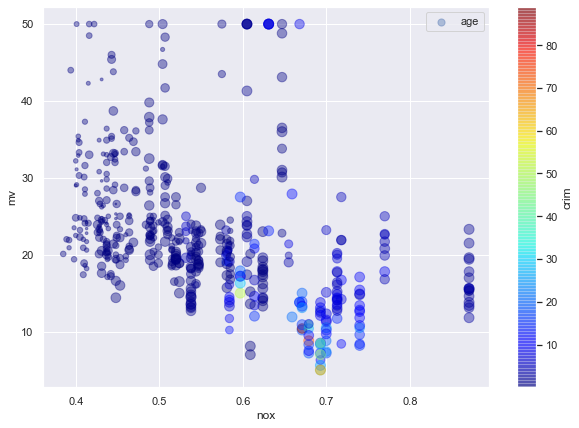

In [105]:
boston_prelim.plot(kind="scatter", x="nox", y="mv", alpha=0.4,
    s=boston_prelim["age"], label="age", figsize=(10,7),
    c="crim", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [96]:
boston_scaled.isnull().sum()

mv         0
crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
dtype: int64

In [14]:
#It appears we have strong coorelations with age and lstat, yet the data needs to be transformed. We will first try log10, then squaring, then cubing
boston['logAge'] = np.log10(boston['age'])
boston['logLstat'] = np.log10(boston['lstat'])
boston['logDis']= np.log10(boston['dis'])
boston['logMv'] = np.log10(boston['mv'])

In [16]:
boston['sqAge'] = np.square(boston['age'])
boston['sqLstat'] = np.square(boston['lstat'])
boston['sqDis'] = np.square(boston['dis'])

In [17]:
boston.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582,0.289668,0.395543,-0.464239,-0.530001,0.382940,0.460510,-0.293661
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386,-0.517372,-0.477706,0.590655,0.363396,-0.544613,-0.323323,0.685935
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754,0.536768,0.597429,-0.761286,-0.543195,0.681602,0.532496,-0.615039
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663,0.091245,-0.074074,-0.087037,0.158569,0.077838,-0.047605,-0.104814
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300,0.640442,0.577072,-0.831977,-0.513431,0.754618,0.530723,-0.661179
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304,-0.207919,-0.664528,0.256584,0.632536,-0.255863,-0.545322,0.158071
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999,0.946946,0.606806,-0.778243,-0.455029,0.982112,0.523764,-0.664043
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315,-0.677360,-0.480612,0.964671,0.342527,-0.748234,-0.448110,0.967552
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766,0.391323,0.460506,-0.560335,-0.486818,0.476367,0.451766,-0.405848
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979,0.423624,0.522385,-0.619008,-0.566214,0.540039,0.494704,-0.425147


In [ ]:
#It appears the log of age is the best transformation. We will utilize it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211449BB518>,
      dtype=object)

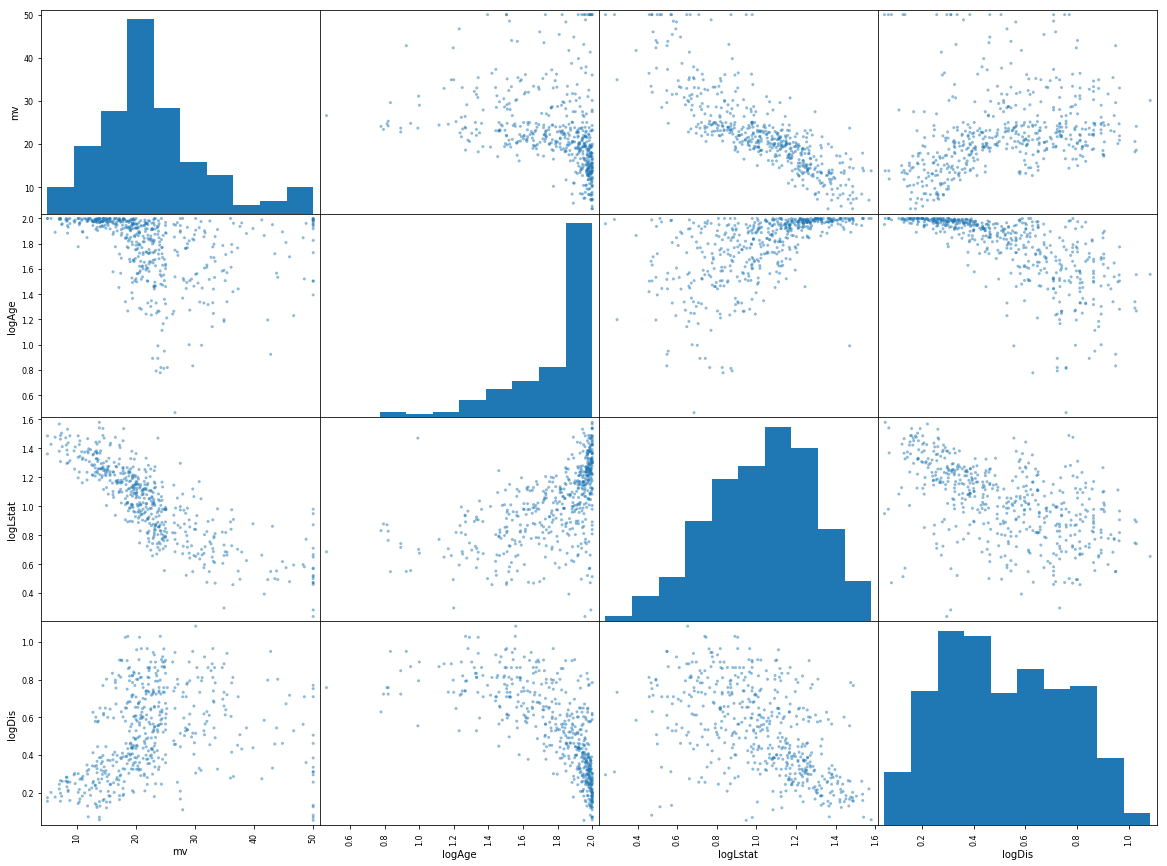

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston[['mv', 'logAge','logLstat','logDis']], figsize=(20,15))

In [ ]:
#TODO
convert log age and check coorelation
convert log lstat and check coorelation
convert log dis and check coorelation

convert sqrt variables



In [19]:
boston['mv'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: mv, dtype: float64

In [50]:
#Update 'mv' outliers to median value
boston['mv'][(boston['mv'] >= 25) | (boston['mv'] <= 17.25)]

2      34.7
3      33.4
4      36.2
5      28.7
8      16.5
10     15.0
20     13.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
30     12.7
31     14.5
32     13.2
33     13.1
34     13.5
39     30.8
40     34.9
41     26.6
42     25.3
47     16.6
48     14.4
52     25.0
55     35.4
57     31.6
61     16.0
63     25.0
64     33.0
       ... 
441    17.1
442    14.8
443    15.4
444    10.8
445    11.8
446    14.9
447    12.6
448    14.1
449    13.0
450    13.4
451    15.2
452    16.1
454    14.4
455    14.1
456    12.7
457    13.5
458    14.9
460    16.4
473    29.8
474    13.8
475    13.3
476    16.7
477    12.0
478    14.6
482    25.0
488    15.2
489     7.0
490     8.1
491    13.6
500    16.8
Name: mv, Length: 265, dtype: float64

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state = 42)
si = SimpleImputer(strategy='median')
si.fit_transform(train_set)

array([[1.50234000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        9.46729000e+03, 6.20508100e+02, 4.41294049e+00],
       [6.27390000e-01, 0.00000000e+00, 8.14000000e+00, ...,
        3.19225000e+03, 7.17409000e+01, 2.02374020e+01],
       [3.46600000e-02, 3.50000000e+01, 6.06000000e+00, ...,
        5.42890000e+02, 6.13089000e+01, 4.40988965e+01],
       ...,
       [1.50100000e-02, 8.00000000e+01, 2.01000000e+00, ...,
        8.82090000e+02, 3.58801000e+01, 6.96223360e+01],
       [1.11604000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        8.94916000e+03, 5.41492900e+02, 4.51435009e+00],
       [2.28760000e-01, 0.00000000e+00, 8.56000000e+00, ...,
        7.29316000e+03, 1.12996900e+02, 7.36959609e+00]])

In [43]:
si.

array([2.61390000e-01, 0.00000000e+00, 8.56000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21000000e+00, 7.77000000e+01, 3.17575000e+00,
       5.00000000e+00, 3.30000000e+02, 1.87000000e+01, 1.09250000e+01,
       2.16000000e+01, 1.89042102e+00, 1.03841776e+00, 5.01834467e-01,
       1.33445375e+00, 6.03729000e+03, 1.19357650e+02, 1.00859380e+01])